In [1]:
import os
from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
cashflow_params = [
            {
                'name':'fix_opex',
                'const_value':-5.000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-0.005,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':0.045,
                'target':'income',
                'multiply':'oil_volume'
            },
            {
                'name':'capex',
                'array_values':{'date':[1],'value':[-70000]},
                'target':'capex'
            }
    ]

In [3]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':0,
        'di':0.15,
        'freq_di':'A',
        'qi':[2000,1300],#{'dist':'norm', 'kw':{'loc':2500,'scale':200}}, #[800,1000],
        'b':0,
        'fluid_rate':5000
    },
    'start':0,
    'end':20,
    'freq_input':'A',
    'freq_output':'A',
    'rate_limit': 700,
    'iter':10,
    'cashflow_params':cashflow_params
}
p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Declination 
 Ti: 0 
 Qi: [2000.0, 1300.0] bbl/d 
 Di: 0.15 A 
 b: 0.0, start=0, end=20, time_list=None, freq_input='A', freq_output='A', rate_limit=700.0, cum_limit=None, iter=10, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', const_value=-5.0, periods=None, array_values=None, target='opex', multiply=None, agg='sum', wi=1, depends=False), CashFlowParams(name='var_opex', const_value=-0.005, periods=None, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='income', const_value=0.045, periods=None, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='capex', const_value=None, periods=None, array_values=ChgPts(date=[1], value=[-70000.0]), target='capex', multiply=None, agg='sum', wi=1, depends=False)], cashflow=None, depends=None, forecast=None)

In [4]:
dca.arps_forecast([0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,8.,9.],800,0.15,0,[0,2])

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)


array([[800.        ,          nan],
       [688.56638114,          nan],
       [592.65457655, 800.        ],
       [510.1025213 , 688.56638114],
       [439.04930888, 592.65457655],
       [377.89324219, 510.1025213 ],
       [325.25572779, 439.04930888],
       [279.95019929, 377.89324219],
       [240.95536953, 325.25572779],
       [207.39220852, 279.95019929]])

In [5]:
fore1 = p1.generate_forecast()
fore1

[0]
[2000.         1721.41595285 1481.63644136 1275.25630324 1097.62327219
  944.73310548  813.13931948           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
 1300.         1118.92036935  963.06368689  828.91659711  713.45512692
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan]
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:239: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.pow

,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period
date,,,,,,,,,,,,,
0,2000.000000,0.000000e+00,0,677887.848065,5000.0,3000.000000,0.600000,1.500000,0.000000e+00,0.0,1.196683e+06,1825000.0,pdp
1,1721.415953,6.778878e+05,0,630675.663008,5000.0,3278.584047,0.655717,1.904586,1.196683e+06,1825000.0,1.240443e+06,1825000.0,pdp
2,1481.636441,1.261351e+06,0,542827.573688,5000.0,3518.363559,0.703673,2.374647,2.480886e+06,3650000.0,1.321867e+06,1825000.0,pdp
3,1275.256303,1.763543e+06,0,467216.022497,5000.0,3724.743697,0.744949,2.920780,3.840417e+06,5475000.0,1.391949e+06,1825000.0,pdp
4,1097.623272,2.195783e+06,0,402136.557277,5000.0,3902.376728,0.780475,3.555297,5.264785e+06,7300000.0,1.452270e+06,1825000.0,pdp
5,944.733105,2.567816e+06,0,346122.142460,5000.0,4055.266895,0.811053,4.292500,6.744957e+06,9125000.0,1.504188e+06,1825000.0,pdp
6,813.139319,2.888028e+06,0,NaN,5000.0,4186.860681,0.837372,5.149008,8.273161e+06,10950000.0,NaN,1825000.0,pdp
0,1300.000000,0.000000e+00,1,440627.101242,5000.0,3700.000000,0.740000,2.846154,0.000000e+00,0.0,1.416594e+06,1825000.0,pdp
1,1118.920369,4.406271e+05,1,409939.180955,5000.0,3881.079631,0.776216,3.468593,1.416594e+06,1825000.0,1.445038e+06,1825000.0,pdp


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

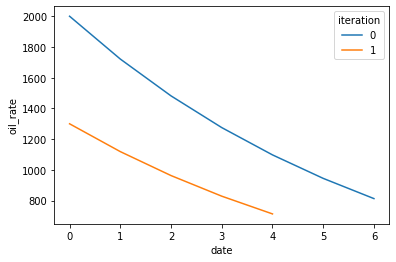

In [6]:
sns.lineplot(data=fore1,  x=fore1.index, y='oil_rate', hue='iteration')

In [7]:
c1 = p1.generate_cashflow()

In [8]:
c1[0].fcf()

,income,total_income,fix_opex,var_opex,total_opex,capex,total_capex,fcf,cum_fcf
0.0,30504.953163,30504.953163,-5.0,-3389.439240,-3394.439240,0.0,0.0,27110.513923,27110.513923
1.0,28380.404835,28380.404835,-5.0,-3153.378315,-3158.378315,-70000.0,-70000.0,-44777.973480,-17667.459557
2.0,24427.240816,24427.240816,-5.0,-2714.137868,-2719.137868,0.0,0.0,21708.102948,4040.643390
3.0,21024.721012,21024.721012,-5.0,-2336.080112,-2341.080112,0.0,0.0,18683.640900,22724.284290
4.0,18096.145077,18096.145077,-5.0,-2010.682786,-2015.682786,0.0,0.0,16080.462291,38804.746581
5.0,15575.496411,15575.496411,-5.0,-1730.610712,-1735.610712,0.0,0.0,13839.885698,52644.632280
6.0,0.000000,0.000000,-5.0,0.000000,-5.000000,0.0,0.0,-5.000000,52639.632280


In [9]:
p1.npv([0.10])

,npv,iteration
0.1,37954.972078,0
0.1,-10334.501904,1


In [10]:
p1.irr(freq_output='A')

,irr
0,-0.999639
1,-0.250092


# Add another period

In [11]:
p1.get_end_dates()

[6, 4]

In [12]:
p2_dict = {
    'name':'pdnp',
    'dca': {
        'ti':7,
        'di':0.2,
        'freq_di':'A',
        'qi':1000,#{'dist':'norm', 'kw':{'loc':3500,'scale':200}}, #[800,1000],
        'b':0,
        'fluid_rate':5000
    },
    'start':0,
    'end':20,
    'freq_input':'A',
    'freq_output':'A',
    'rate_limit': 80,
    'iter':14,
    'cashflow_params':cashflow_params,
    'depends':{'period':'pdp'}
}
p2 = Period(**p2_dict)
p2

Period(name='pdnp', dca=Declination 
 Ti: 7 
 Qi: 1000.0 bbl/d 
 Di: 0.2 A 
 b: 0.0, start=0, end=20, time_list=None, freq_input='A', freq_output='A', rate_limit=80.0, cum_limit=None, iter=14, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', const_value=-5.0, periods=None, array_values=None, target='opex', multiply=None, agg='sum', wi=1, depends=False), CashFlowParams(name='var_opex', const_value=-0.005, periods=None, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='income', const_value=0.045, periods=None, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='capex', const_value=None, periods=None, array_values=ChgPts(date=[1], value=[-70000.0]), target='capex', multiply=None, agg='sum', wi=1, depends=False)], cashflow=None, depends=Depends(period='pdp', delay=None), forecast=None)

In [13]:
#s1 = Scenario(name='base', periods=[p1,p2])
s1 = Scenario(**{
    'name':'base',
    'periods':[
        p1_dict,
        p2_dict
    ]
})
s1

Scenario(name='base', periods=[Period(name='pdp', dca=Declination 
 Ti: 0 
 Qi: [2000.0, 1300.0] bbl/d 
 Di: 0.15 A 
 b: 0.0, start=0, end=20, time_list=None, freq_input='A', freq_output='A', rate_limit=700.0, cum_limit=None, iter=10, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', const_value=-5.0, periods=None, array_values=None, target='opex', multiply=None, agg='sum', wi=1, depends=False), CashFlowParams(name='var_opex', const_value=-0.005, periods=None, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='income', const_value=0.045, periods=None, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1, depends=False), CashFlowParams(name='capex', const_value=None, periods=None, array_values=ChgPts(date=[1], value=[-70000.0]), target='capex', multiply=None, agg='sum', wi=1, depends=False)], cashflow=None, depends=None, forecast=None), Period(name='pdnp', dca=Declination 
 Ti: 7 
 Qi: 1000.0 bbl/

In [14]:
sf1 = s1.generate_forecast(iter=3)
sf1

[0]
[2000.         1721.41595285 1481.63644136 1275.25630324 1097.62327219
  944.73310548  813.13931948           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
 1300.         1118.92036935  963.06368689  828.91659711  713.45512692
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan]
pdnp
[6, 4]
[6 4]
[          nan           nan           nan           nan           nan
           nan 1000.          818.73075308  670.32004604  548.81163609
  449.32896412  367.87944117  301.19421191  246.59696394  201.89651799
  165.29888822  135.33528324  110.80315836   90.71795329           nan
           nan           nan           nan           nan 1000.
  818.73075308  670.32004604  548.81163609  449.32896412  367.

,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period,scenario
date,,,,,,,,,,,,,,
0,2000.000000,0.000000e+00,0,677887.848065,5000.0,3000.000000,0.600000,1.500000,0.000000e+00,0.0,1.196683e+06,1825000.0,pdp,base
1,1721.415953,6.778878e+05,0,630675.663008,5000.0,3278.584047,0.655717,1.904586,1.196683e+06,1825000.0,1.240443e+06,1825000.0,pdp,base
2,1481.636441,1.261351e+06,0,542827.573688,5000.0,3518.363559,0.703673,2.374647,2.480886e+06,3650000.0,1.321867e+06,1825000.0,pdp,base
3,1275.256303,1.763543e+06,0,467216.022497,5000.0,3724.743697,0.744949,2.920780,3.840417e+06,5475000.0,1.391949e+06,1825000.0,pdp,base
4,1097.623272,2.195783e+06,0,402136.557277,5000.0,3902.376728,0.780475,3.555297,5.264785e+06,7300000.0,1.452270e+06,1825000.0,pdp,base
5,944.733105,2.567816e+06,0,346122.142460,5000.0,4055.266895,0.811053,4.292500,6.744957e+06,9125000.0,1.504188e+06,1825000.0,pdp,base
6,813.139319,2.888028e+06,0,NaN,5000.0,4186.860681,0.837372,5.149008,8.273161e+06,10950000.0,NaN,1825000.0,pdp,base
0,1300.000000,0.000000e+00,1,440627.101242,5000.0,3700.000000,0.740000,2.846154,0.000000e+00,0.0,1.416594e+06,1825000.0,pdp,base
1,1118.920369,4.406271e+05,1,409939.180955,5000.0,3881.079631,0.776216,3.468593,1.416594e+06,1825000.0,1.445038e+06,1825000.0,pdp,base


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

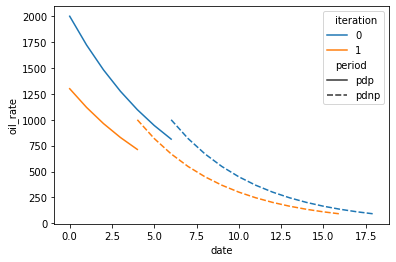

In [15]:
sns.lineplot(data=sf1, x=sf1.index, y='oil_rate', hue='iteration', style='period')

In [16]:
s1.forecast.df()

,oil_rate,oil_cum,oil_volume,gas_rate,gas_cum,gas_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,fluid_volume,iteration,period,scenario,well
date,,,,,,,,,,,,,,,,,
0,2000.000000,0.000000e+00,677887.848065,None,None,None,5000.0,3000.000000,0.600000,1.500000,0.000000e+00,0.0,1825000.0,0,pdp,base,None
1,1721.415953,6.778878e+05,630675.663008,None,None,None,5000.0,3278.584047,0.655717,1.904586,1.196683e+06,1825000.0,1825000.0,0,pdp,base,None
2,1481.636441,1.261351e+06,542827.573688,None,None,None,5000.0,3518.363559,0.703673,2.374647,2.480886e+06,3650000.0,1825000.0,0,pdp,base,None
3,1275.256303,1.763543e+06,467216.022497,None,None,None,5000.0,3724.743697,0.744949,2.920780,3.840417e+06,5475000.0,1825000.0,0,pdp,base,None
4,1097.623272,2.195783e+06,402136.557277,None,None,None,5000.0,3902.376728,0.780475,3.555297,5.264785e+06,7300000.0,1825000.0,0,pdp,base,None
5,944.733105,2.567816e+06,346122.142460,None,None,None,5000.0,4055.266895,0.811053,4.292500,6.744957e+06,9125000.0,1825000.0,0,pdp,base,None
6,813.139319,2.888028e+06,NaN,None,None,None,5000.0,4186.860681,0.837372,5.149008,8.273161e+06,10950000.0,1825000.0,0,pdp,base,None
0,1300.000000,0.000000e+00,440627.101242,None,None,None,5000.0,3700.000000,0.740000,2.846154,0.000000e+00,0.0,1825000.0,1,pdp,base,None
1,1118.920369,4.406271e+05,409939.180955,None,None,None,5000.0,3881.079631,0.776216,3.468593,1.416594e+06,1825000.0,1825000.0,1,pdp,base,None
